# Real data process



In [1]:
import pandas as pd
import numpy as np
import csv
import pickle
from matplotlib import pyplot as plt
import time
from State_system1 import *
%load_ext autoreload
%autoreload 2

### Data Read

In [2]:
covid_path = '/Users/liuyang/Data/Covid data/Covid-actual.csv'

Pref_covid = {} #the dict to store the real covid data, the active infective is a sum of 7 day increase
with open(covid_path, newline='') as cov_f:
    cov_reader = csv.reader(cov_f, delimiter= ' ', quotechar='|')
    next(cov_reader, None)
    for row in cov_reader:
        list_cov=row[0].split(',')
        Pref_covid[list_cov[0]] = [int(n) for n in list_cov[1:]]


In [4]:
cumu_vac_path = 'V_data/Cumu_vac.csv'

Cumu_vac = {} #the dict to store the real covid data, the active infective is a sum of 7 day increase
with open(cumu_vac_path, newline='') as cu_v_f:
    cu_v_reader = csv.reader(cu_v_f, delimiter= ' ', quotechar='|')
    next(cu_v_reader, None)
    for row in cu_v_reader:
        list_cv=row[0].split(',')
        Cumu_vac[list_cv[0]] = [int(n) for n in list_cv[1:]]

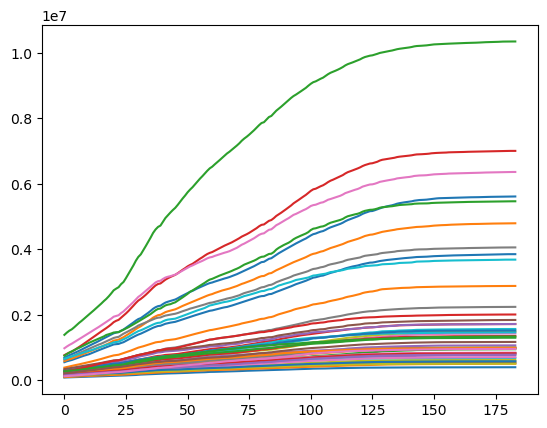

In [6]:
for i in Cumu_vac:
    if i != '0':
        plt.plot(Cumu_vac[i])
plt.show()

In [4]:
vac_cnt_path = 'V_data/Vaccine_cnt.csv'

Vac_cnt = {} #the dict to store the real covid data, the active infective is a sum of 7 day increase
with open(vac_cnt_path, newline='') as vac_cnt_f:
    vac_cnt_reader = csv.reader(vac_cnt_f, delimiter= ' ', quotechar='|')
    next(vac_cnt_reader, None)
    for row in vac_cnt_reader:
        list_vc=row[0].split(',')
        Vac_cnt[list_vc[0]] = [int(n)/7 for n in list_vc[1:]]

In [5]:
commute_path = 'V_data/Commute.csv'
covid_path = 'V_data/Covid.csv'
travel_path = 'V_data/Transport_data.csv'
kpa_path = 'V_data/Kpa_rate.csv'

##########
sigma = {} #the dict to store the commuting rate data, {(residence, work): commute rate}
with open(commute_path, newline='') as com_f:
    com_reader = csv.reader(com_f, delimiter= ' ', quotechar='|')
    next(com_reader, None)
    for row in com_reader:
        (res, wor, rate)=row[0].split(',')
        sigma[(int(res), int(wor))] = float(rate)
for i in sigma:
    if i[0]==i[1]:
        sigma[i]=0

#########
N_p = {} #the dict to store population data {area code: population}
N_0 = {}  # the dict to store the initial health state data {area code: [S,V, L, I_a, I_t, I_nt, R]}
with open(covid_path, newline='') as covid_f:
    covid_reader = csv.reader(covid_f, delimiter= ' ', quotechar='|')
    next(covid_reader, None)
    for row in covid_reader:
        (code, t_pop, S, V, L, I, R)=row[0].split(',')
        N_p[int(code)] = int(t_pop)
        N_0[int(code)]= [float(S),float(V), float(L),float(I),float(R)]
###########
X = {} #the dict to store travel data {(date, dep, arr): passenger count}
with open(travel_path, newline='') as travel_f:
    travel_reader = csv.reader(travel_f, delimiter= ' ', quotechar='|')
    next(travel_reader, None)
    for row in travel_reader:
        (dep, arr, pcnt)=row[0].split(',')
        #print(dep, arr)
        X[(int(dep), int(arr))] = float(pcnt)*1000/365
############
kpa = {} # the dict to store the infection rate for different areas {area code: infection rate}
with open(kpa_path, newline='') as kpa_f:
    kpa_reader = csv.reader(kpa_f, delimiter= ' ', quotechar='|')
    next(kpa_reader, None)
    for row in kpa_reader:
        (code, kpa_j)=row[0].split(',')
        kpa[int(code)] = float(kpa_j)

In [6]:
cum_inf_path = 'V_data/Cumulative_inf.csv'

cum_inf = {} #the dict to store the real covid data, the active infective is a sum of 7 day increase
with open(cum_inf_path, newline='') as cum_inf_f:
    cum_inf_reader = csv.reader(cum_inf_f, delimiter= ' ', quotechar='|')
    next(cum_inf_reader, None)
    for row in cum_inf_reader:
        list_ci=row[0].split(',')
        cum_inf[list_ci[0]] = [int(n) for n in list_ci[1:]]

### Data process

In [7]:
beta = {}
for j in Cumu_vac:
    if j != '0':
        beta[int(j)] = [Vac_cnt[j][t]/(N_p[int(j)]-Cumu_vac[j][t]-cum_inf[j][t]) for t in range(len(Cumu_vac[j]))]

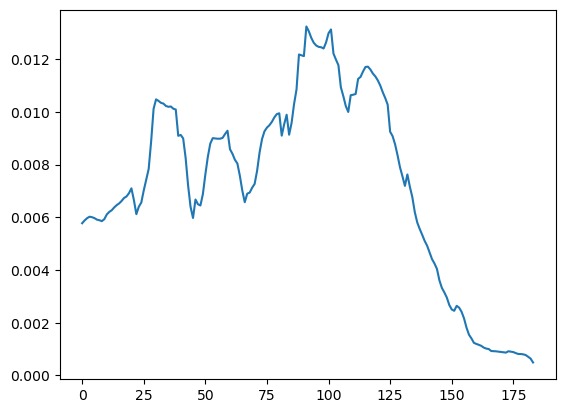

In [8]:
beta_c = [Vac_cnt['0'][t]/(sum(N_p[l] for l in N_p)-Cumu_vac['0'][t]-cum_inf['0'][t]) for t in range(len(Cumu_vac['0']))]
plt.plot(beta_c)

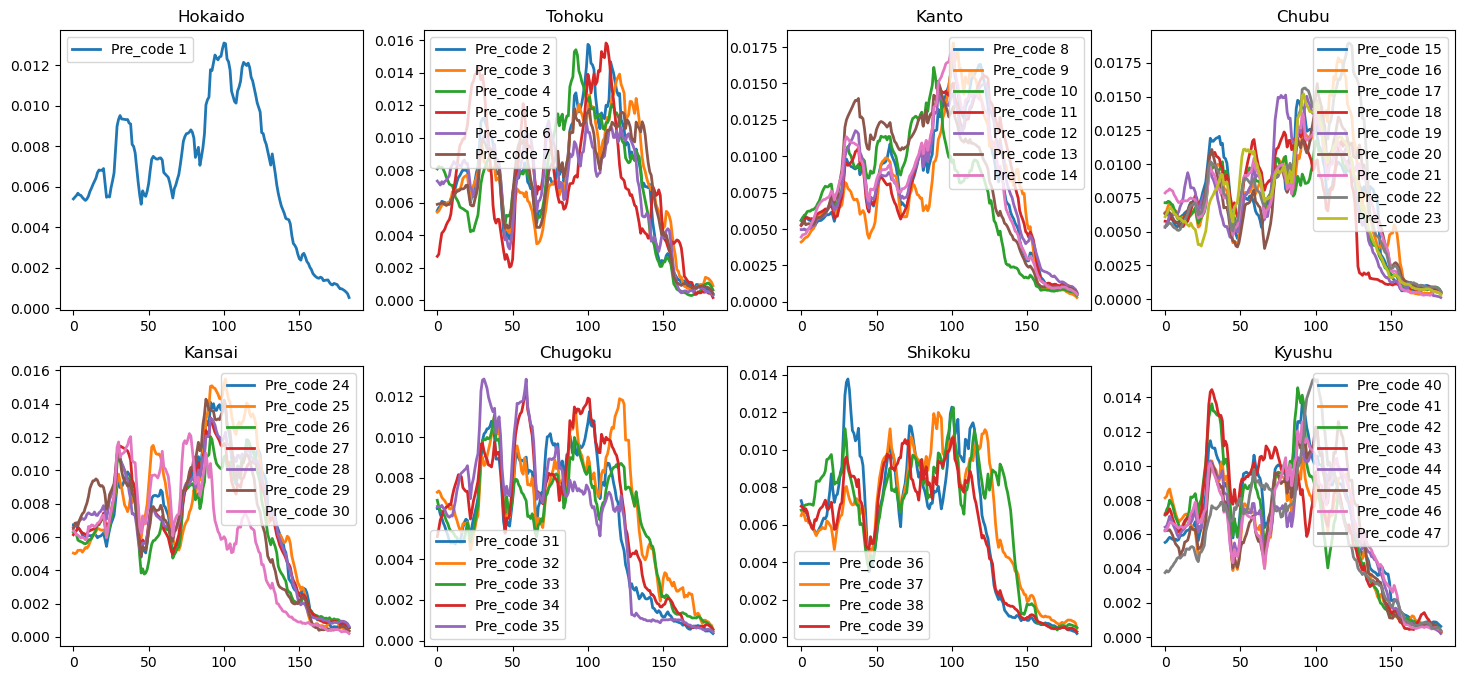

In [9]:
region = {'Hokaido':[1], 
          'Tohoku':[2, 3, 4, 5, 6, 7], 
          'Kanto':[8, 9, 10, 11, 12, 13, 14],
          'Chubu':[15, 16, 17, 18, 19, 20, 21, 22, 23],
          'Kansai':[24, 25, 26, 27, 28, 29, 30],
          'Chugoku':[31, 32, 33, 34, 35],
          'Shikoku':[36, 37, 38, 39],
          'Kyushu':[40, 41, 42, 43, 44, 45, 46, 47]}

plt.figure(figsize=(18,8))
i = 1
for n in region:
    plt.subplot(2,4,i)
    #plt.hlines(0.002, 0, 180, linewidth = 2, linestyle='--')
    for pre in region[n]:
        plt.plot(beta[pre], linewidth = 2, label='Pre_code {0}'.format(pre))
    #plt.title(region_name[n], fontsize = 13)
    #plt.ylabel('Vaccination rate', loc='top', fontsize = 12)
    #plt.xlabel('day', loc='right', fontsize = 12)
    plt.legend(loc='best')
    plt.title(n)
    i+=1
plt.show()

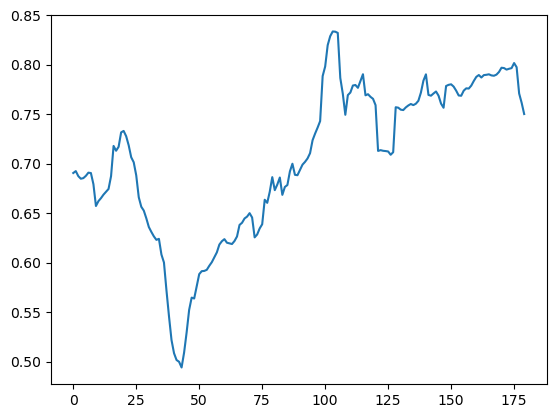

In [10]:
with open('V_data/Tsp_rate.pkl', 'rb') as f:
    tsp_a_rate = pickle.load(f)
    
# the overall transport rate of 2021 to 2019
t_ra = tsp_a_rate
plt.plot(t_ra)

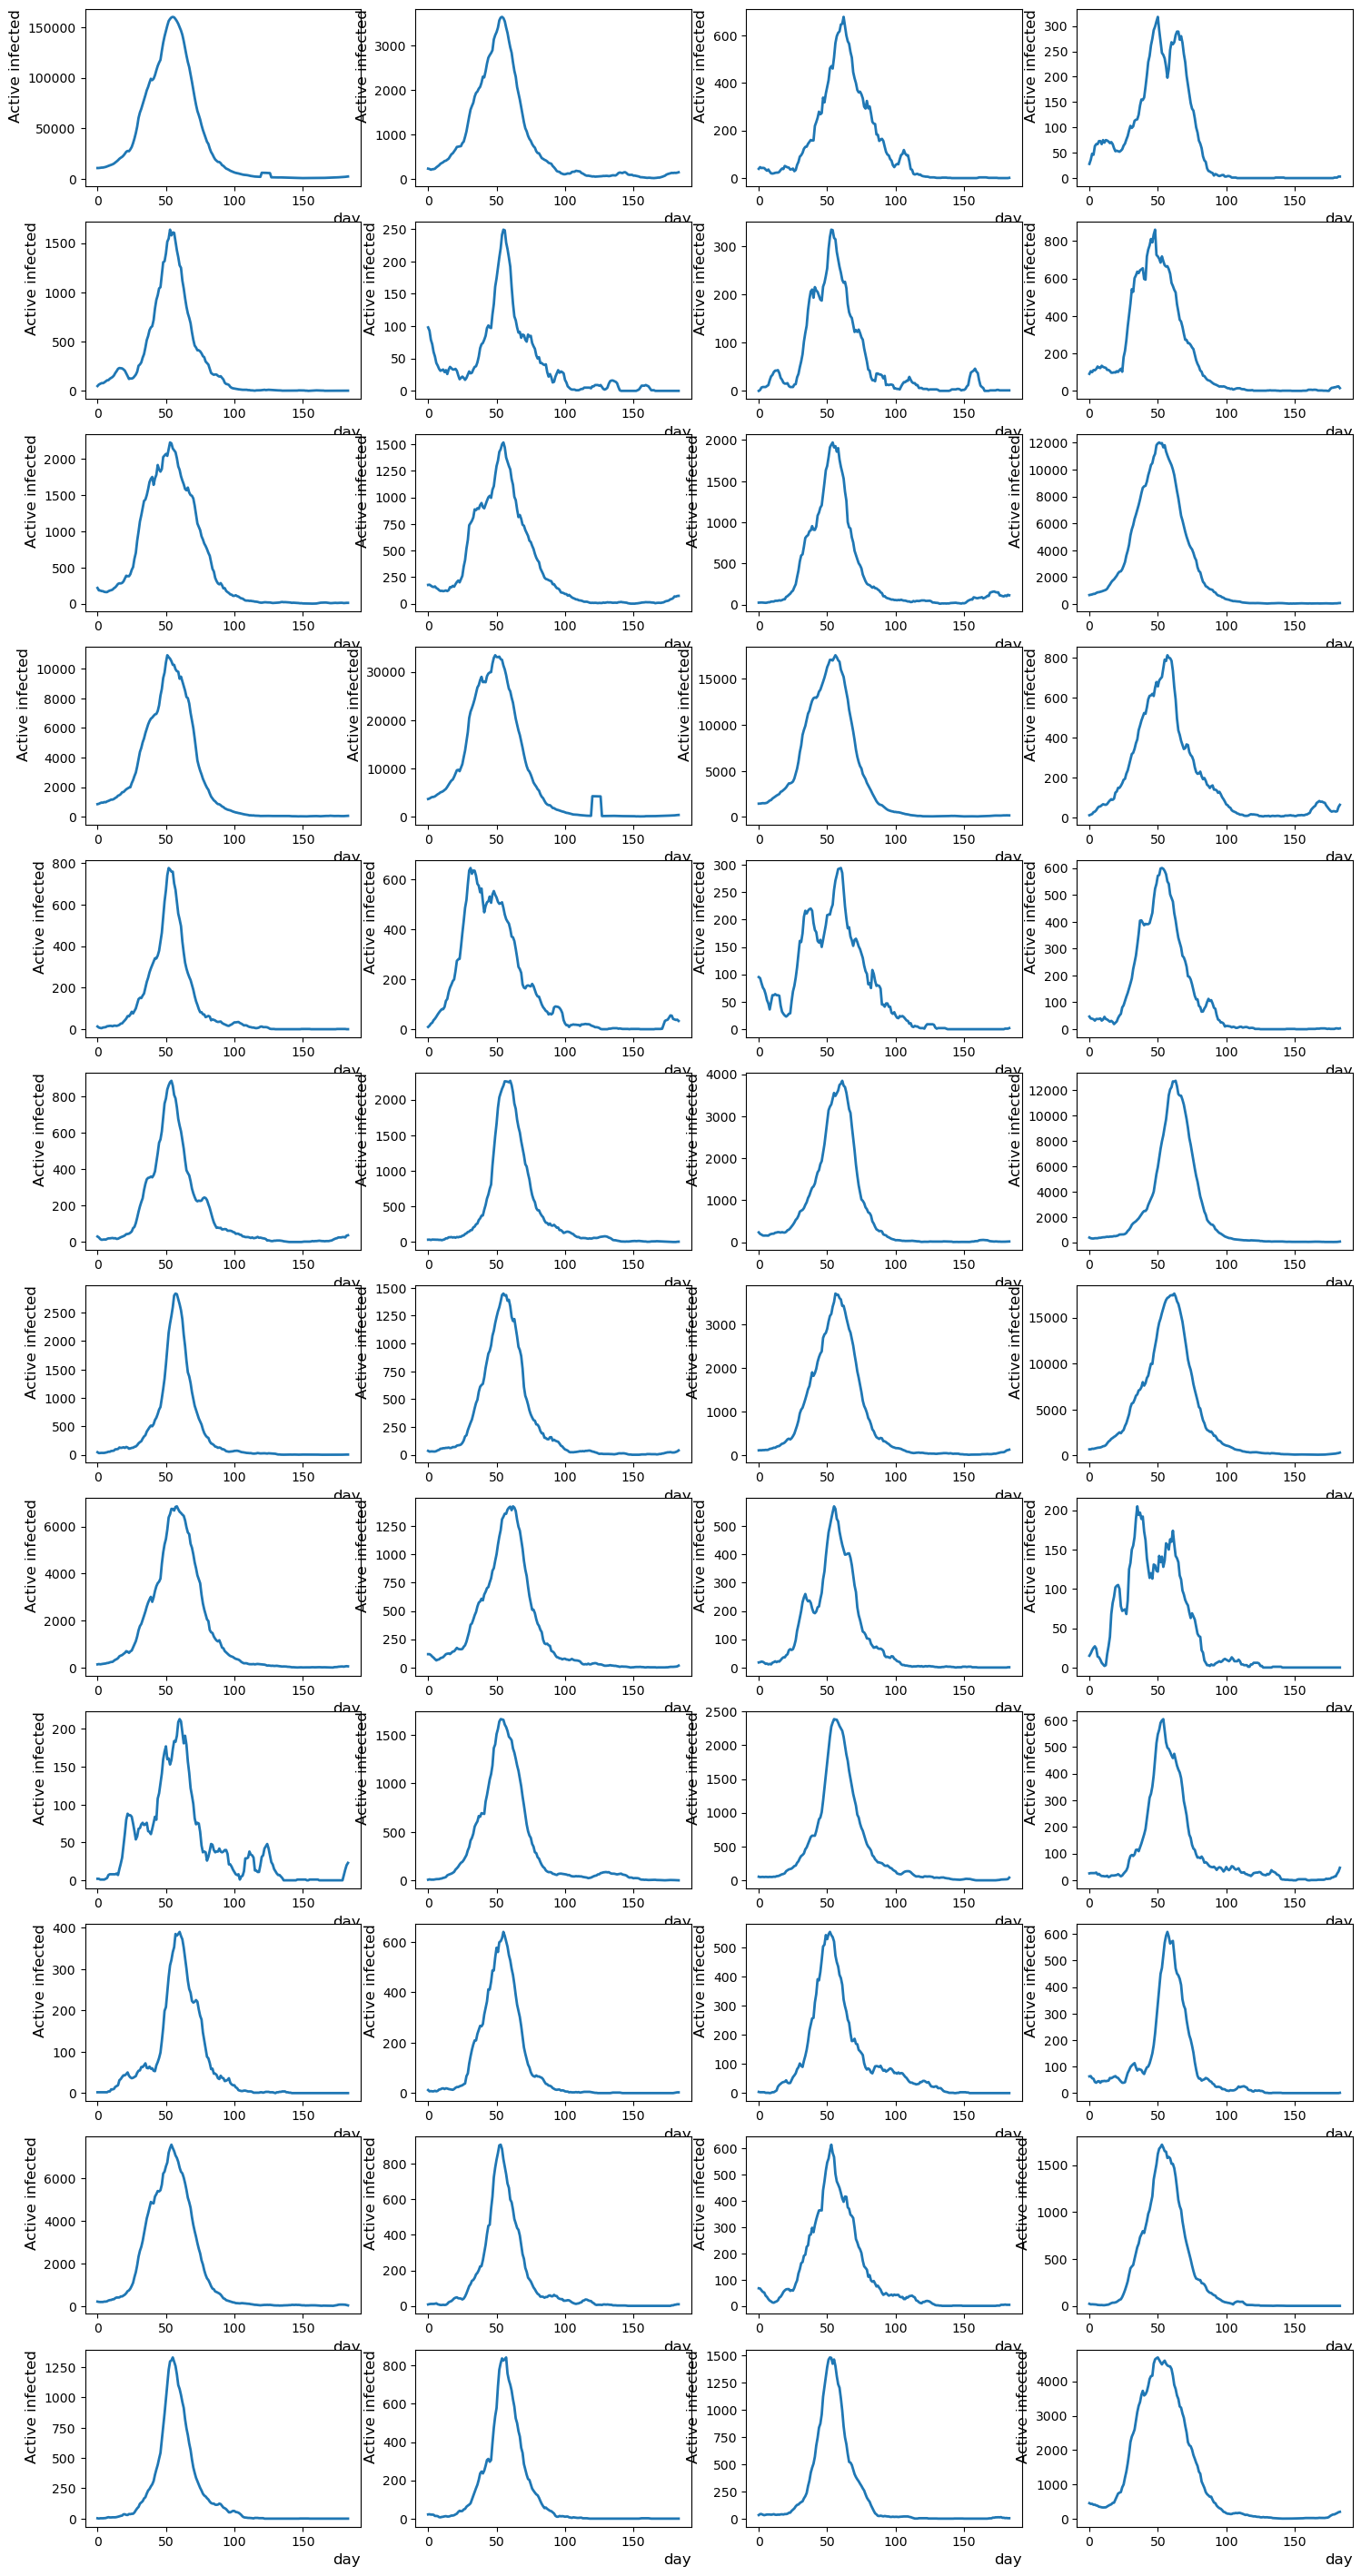

In [11]:
plt.figure(figsize=(18,36))
for n in Pref_covid:
    plt.subplot(12,4,int(n)+1)
    #plt.plot(R_inf1[0][n][3], linewidth = 2)
    plt.plot(Pref_covid[n], linewidth = 2)
    #plt.title(region_name[n], fontsize = 13)
    plt.ylabel('Active infected', loc='top',fontsize = 12)
    plt.xlabel('day', loc='right',fontsize = 12)
plt.show()